In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,8,2007
1,Romans,2016
2,Ultra-Toxic,2005
3,The Candy Man,1969
4,Friends & Lovers: The Ski Trip 2,2008


In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
2,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
3,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
4,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN


### Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [46]:
sup_bat = cast[(cast.character == 'Superman') | (cast.character == 'Batman')]
sup_bat = sup_bat.groupby(['year','character']).size().unstack().fillna(0)
sup_year = (sup_bat.Superman - sup_bat.Batman)
sup_year = (sup_year[sup_year > 0]).count()
sup_year

12

### How many years have been "Batman years", with more Batman characters than Superman characters?

In [48]:
bat_year = (sup_bat.Batman - sup_bat.Superman)
bat_year = (bat_year[bat_year > 0]).count()
bat_year

24

### Plot the number of actor roles each year and the number of actress roles each year over the history of film.

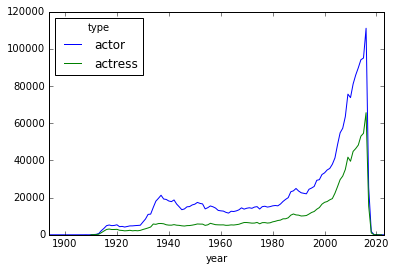

In [56]:
cast.groupby(['year','type']).size().unstack().plot()

### Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

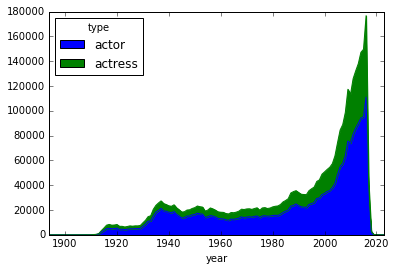

In [59]:
cast.groupby(['year','type']).size().unstack().plot(kind='area')

### Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

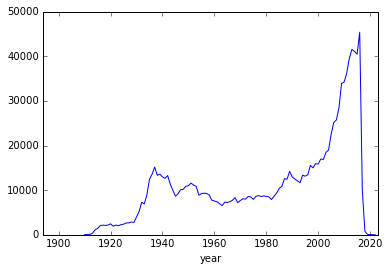

In [63]:
castDiff = cast.groupby(['year','type']).size().unstack()
castDiff = (castDiff.actor - castDiff.actress)
castDiff.plot()

### Plot the fraction of roles that have been 'actor' roles each year in the hitsory of film.

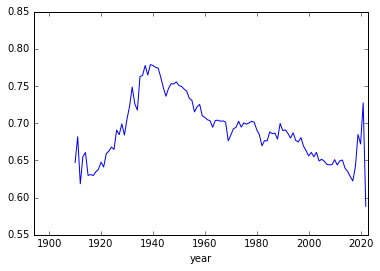

In [67]:
castFrac = cast.groupby(['year','type']).size().unstack()
castFrac = (castFrac.actor / (castFrac.actress + castFrac.actor))
castFrac.plot()

### Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

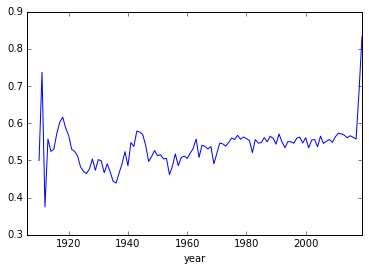

In [77]:
castSup = cast[cast.n ==2].groupby(['year','type']).size().unstack()
castSup = (castSup.actor / (castSup.actor + castSup.actress))
castSup.plot()

### Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

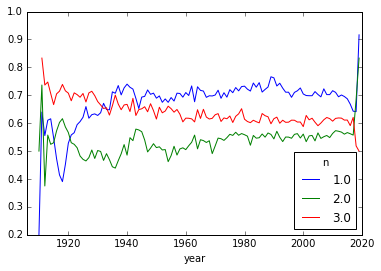

In [86]:
castN = cast[cast.n < 4].groupby(['year','type','n']).size().unstack('type')
castN = (castN.actor / (castN.actor + castN.actress)).unstack()
castN.plot()